In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve,auc, fbeta_score
import matplotlib.pyplot as plt
from sklearn import tree


In [77]:
titanic_df = pd.read_csv('titanicdf.csv')

In [78]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
titanic_df.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [80]:
titanic_df = titanic_df[['Survived','Pclass','Age','Fare']]

In [46]:
titanic_df.dropna(inplace=True)

<AxesSubplot:ylabel='Frequency'>

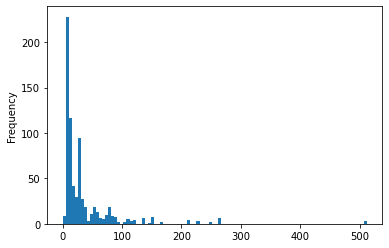

In [47]:
titanic_df.Fare.plot(kind='hist', bins=100)

<AxesSubplot:ylabel='Frequency'>

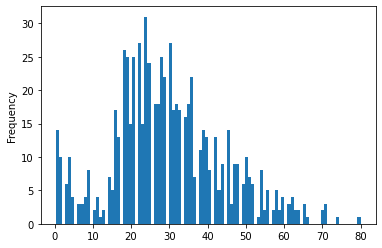

In [48]:
titanic_df.Age.plot(kind='hist', bins=100)

<AxesSubplot:>

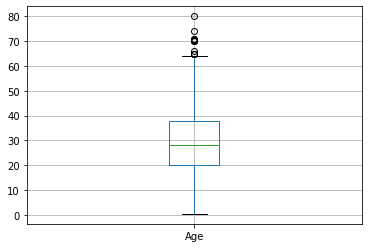

In [49]:
titanic_df.boxplot('Age')

In [50]:
X_train, X_test, y_train, y_test = train_test_split(titanic_df.drop('Survived',axis=1), titanic_df['Survived'], test_size=0.33, random_state=42)

In [51]:
X_train.head()

,Pclass,Age,Fare
271,3,25.0,0.0000
853,1,16.0,39.4000
696,3,44.0,8.0500
518,2,36.0,26.0000
609,1,40.0,153.4625


In [52]:
clf = tree.DecisionTreeClassifier()

In [53]:
model = clf.fit(X_train, y_train)
pred = model.predict(X_test)


In [54]:
print('Accuracy:',accuracy_score(y_test,pred))
print('Precision:',precision_score(y_test,pred))
print('Recall:',recall_score(y_test,pred))
print('F1:',f1_score(y_test,pred))


Accuracy: 0.6483050847457628
Precision: 0.5930232558139535
Recall: 0.5151515151515151
F1: 0.5513513513513513


# ROC-AUC

In [55]:
model.predict(X_test)

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0], dtype=int64)

In [56]:
model.predict_proba(X_test)[:,1]

array([1.        , 1.        , 1.        , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.5       ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 1.        ,
       1.        , 0.5       , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 1.        , 1.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.     

In [57]:
pred_proba = model.predict_proba(X_test)[:,1]

In [58]:
fpr, tpr, treshold = roc_curve(y_test, pred_proba)
tree_auc = roc_auc_score(y_test, pred_proba)
print('DecisionTreeClassifier: ROC AUC=%.3f' % (tree_auc))

DecisionTreeClassifier: ROC AUC=0.630


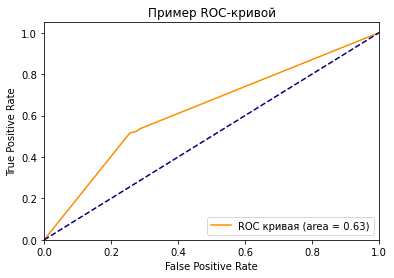

In [59]:
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr,  color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')
plt.legend(loc="lower right")
plt.show()

In [60]:
treshold

array([2.        , 1.        , 0.5       , 0.33333333, 0.        ])

# Подбор гиперпараметров

In [61]:
test_deep = []
for deep in range (1,31):
  for leaf in range (1,5):
    # print("--------", deep, "--------", leaf)
    clf = tree.DecisionTreeClassifier(max_depth=deep, min_samples_leaf=leaf)
    model = clf.fit(X_train, y_train)
    pred = model.predict(X_test)
    test_deep.append([deep,leaf,f1_score(y_test,pred),recall_score(y_test,pred)])

In [62]:
test_deep = pd.DataFrame(test_deep)
test_deep.columns = ['tree_depth','leaf','f1_score','recall_score']
# test_deep.sort_values(by='f1_score',ascending=False).head()

In [63]:
test_deep.sort_values(by='f1_score',ascending=False).head(10)

,tree_depth,leaf,f1_score,recall_score
0,1,1,0.660287,0.696970
2,1,3,0.660287,0.696970
3,1,4,0.660287,0.696970
1,1,2,0.660287,0.696970
4,2,1,0.648936,0.616162
5,2,2,0.648936,0.616162
6,2,3,0.648936,0.616162
7,2,4,0.648936,0.616162
36,10,1,0.622222,0.565657
30,8,3,0.605714,0.535354


# GridSearch

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [65]:
tree_para = {'criterion':['gini','entropy'],
             'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
             'min_samples_leaf':[1,2,3,4,5]}

In [66]:
tree_para

{'criterion': ['gini', 'entropy'],
 'max_depth': [4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  15,
  20,
  30,
  40,
  50,
  70,
  90,
  120,
  150],
 'min_samples_leaf': [1, 2, 3, 4, 5]}

In [67]:
clf_gs = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=10, scoring = 'recall')
clf_gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150],
                         'min_samples_leaf': [1, 2, 3, 4, 5]},
             scoring='recall')

In [68]:
clf_gs.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1}

# New best params

In [69]:
model_new = DecisionTreeClassifier(**clf_gs.best_params_)


In [70]:
model_new.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [71]:
new_pred = model_new.predict(X_test)

In [72]:
print('Accuracy:',accuracy_score(y_test,new_pred))
print('Precision:',precision_score(y_test,new_pred))
print('Recall:',recall_score(y_test,new_pred))
print('F1:',f1_score(y_test,new_pred))


Accuracy: 0.6949152542372882
Precision: 0.6956521739130435
Recall: 0.48484848484848486
F1: 0.5714285714285715


# Кросс-валидация

In [73]:
cv = ShuffleSplit(n_splits=10, test_size=0.33, random_state=0)
scores = cross_val_score(model_new, X_train, y_train, cv=cv, scoring='recall')


In [74]:
scores.mean()

0.5293112011181911

In [75]:
scores

array([0.46031746, 0.63793103, 0.38095238, 0.57894737, 0.61428571,
       0.36363636, 0.57407407, 0.52857143, 0.57627119, 0.578125  ])